# Task 2 - qosf

The bit-flip code and the sign-flip code are two very simple circuits able to detect and fix the bit-flip and the sign-flip errors, respectively.

1.	Build the simple circuit to prepare the Bell state.

2.	Now add, right before the CNOT gate and for each of the two qubits, an arbitrary “error gate”. By error gate we mean that with a certain probability (that you can decide but   must be non-zero for all the choices) you have a 1 qubit unitary which can be either the identity, or the X gate (bit-flip error) or the Z gate (sign-flip error).

3.	Encode each of the two qubits with a sign-flip or a bit-flip code, in such a way that all the possible choices for the error gates described in 2), occurring on the logical qubits, can be detected and fixed. Motivate your choice. This is the most non-trivial part of the problem, so do it with a lot of care!

4.	Test your solution by making many measurements over the final state and testing that the results are in line with the expectations.

<br> <hr>

# Solution

In [414]:
%matplotlib inline

#Importing standard Qiskit libraries

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit_textbook.tools import array_to_latex

## 1. Bell State

_The_ _Bell_ _State_ has **50%** probability of being measured in the state $|00\rangle$, and **50%** chance of being measured in the state $|11\rangle$.

Qubits Q0 & Q1 are used to build the Bell State.
    

1. Hadamard Gate is applied to Q0. So, $$ Q0= H|0\rangle = |+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$$$$Q1= |0\rangle$$This produces the state $|0\rangle \otimes |{+}\rangle = |0{+}\rangle$ :
$$
|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |01\rangle)
$$


2. The CNOT Gate is applied to both Q0 and Q1. We have the final state as:

$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 

So, the final circuit will be in Bell State as the probability of being measured in the state $|00\rangle$ is $\tfrac{1}{2}$ or 50%, and the probability of being measured in the state $|11\rangle$ is $\tfrac{1}{2}$ i.e., 50%.

In Qiskit, Bell Sate is given as:

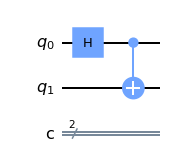

In [415]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(0)     # Hadamard Gate at Q0
                 # No Gate to Q1
circuit.cx(0,1) # CNOT Gate to Q0 & Q1

circuit.draw() # Draw the circuit

In [416]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(circuit,backend).result().get_statevector()

array_to_latex(final_state, pretext="\\text{Statevector = }") # Write state vector

<IPython.core.display.Math object>

The state vector is same as: $$\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

Hence, the state has 50% probability of being measured in the state $|00\rangle$, and 50% chance of being measured in the state $|11\rangle$. 

Also, it has **0%** chance of being measured in the states $|01\rangle$ or $|10\rangle$. This can be shown by plotting a histogram of the probabilities of the outcomes of the circuit.

		 {'00': 552, '11': 472}


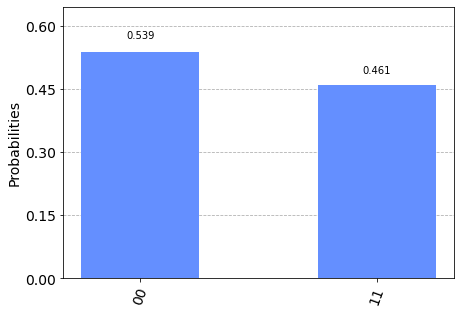

In [417]:
# Create a Quantum Circuit
meas = QuantumCircuit(2, 2)
meas.measure(range(2), range(2))

qc = circuit + meas

backend_sim = Aer.get_backend('qasm_simulator') # Use Aer's qasm_simulator

# Execute the circuit on the qasm simulator.
job_sim = execute(qc, backend_sim, shots=1024) # The number of repeats of the circuit is 1024
result_sim = job_sim.result() # Grab the results from the job.

counts = result_sim.get_counts(qc)
print("\t\t", counts)

plot_histogram(counts) # Plot Histogram for Bell State

## 2. Adding Errors

The errors are to be added right before the CNOT gate and for each of the two qubits, an arbitrary “error gate”. Error gate is a 1 qubit unitary with a certain probability, which can be:
1. The Identity 
2. The X gate (bit-flip error) 
3. The Z gate (sign-flip error)

<br>

### 2.1 The Identity Gate

The I-gate has no effect on the qubits. It is represented by the Identity matrix:

$$ I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} $$

<br> <br>

#### 2.1.1 Adding identity error to qubit Q0

The I-gate will not change Q0. This can also be shown by the state vector of the circuit simulated with identity error at Q0 before CNOT.


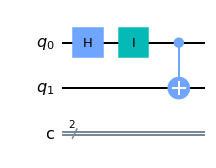

In [418]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#### Bell State ####
circuit.h(0) # Hadamard Gate at Q0
             # No Gate to Q1
             # CNOT Gate to Q0 & Q1 after error gate

circuit.i(0) # Add Identity Error to Q0

circuit.cx(0,1) # CNOT Gate to Q0 & Q1 for Bell State

circuit.draw()

In [419]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(circuit,backend).result().get_statevector()

array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

#### 2.1.2 Adding identity error to qubit Q1
The I-gate will not change Q1. This can also be shown by the state vector of the circuit simulated with identity error at Q1 before CNOT.

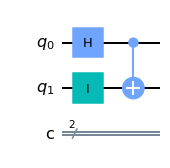

In [420]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#### Bell State ####
circuit.h(0) # Hadamard Gate at Q0
             # No Gate to Q1
             # CNOT Gate to Q0 & Q1 after error gate

circuit.i(1) # Add Identity Error to Q1

circuit.cx(0,1) # CNOT Gate to Q0 & Q1 for Bell State

circuit.draw()

In [421]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(circuit,backend).result().get_statevector()

array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

### 2.2 The X Gate (Bit-Flip Error)

The X-gate is represented by the Pauli-X matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$$

The X-gate flips the spin of the qubit. It changes $|0\rangle$ to $|1\rangle$ and $|0\rangle$ to $|1\rangle$.

<br> <br>

#### 2.2.1 Adding bit-flip error to Q0 before CNOT gate

$$ X|+\rangle = X[\tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle)] = \tfrac{1}{\sqrt{2}}(X|0\rangle+X|1\rangle) = \tfrac{1}{\sqrt{2}}(|1\rangle+|0\rangle) = |+\rangle$$

So, the X-gate will not change Q0. 

This can also be shown by the state vector of the circuit simulated with bit-flip error at Q0 before CNOT.


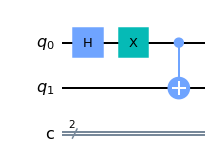

In [422]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#### Bell State ####
circuit.h(0) # Hadamard Gate at Q0
             # No Gate to Q1
             # CNOT Gate to Q0 & Q1 after error gate

circuit.x(0) # Add Bit-Flip Error to Q0

circuit.cx(0,1) # CNOT Gate to Q0 & Q1 for Bell State

circuit.draw()

In [423]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(circuit,backend).result().get_statevector()

array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

#### 2.2.2 Adding bit-flip error to Q1

$$ X|0\rangle = |1\rangle$$

So, the X-gate changes the spin of Q1 or the bit of the qubit is flipped. 

This can also be shown by the state vector of the circuit simulated with bit-flip error at Q1 before CNOT.

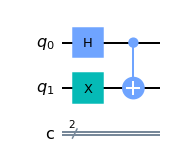

In [424]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#### Bell State ####
circuit.h(0) # Hadamard Gate at Q0
             # No Gate to Q1
             # CNOT Gate to Q0 & Q1 after error gate

circuit.x(1) # Add Bit-Flip Error to Q0

circuit.cx(0,1) # CNOT Gate to Q0 & Q1 for Bell State

circuit.draw()

In [425]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(circuit,backend).result().get_statevector()

array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

### 2.3 The Z Gate (Sign-Flip Error)

The Z-gate is represented by the Pauli-Z matrix:

$$ Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

The Z gate flips the phase of the qubit. It changes $|0\rangle$ to $|0\rangle$ and $|1\rangle$ to $-|1\rangle$.

<br> <br>

#### 2.3.1 Adding sign-flip error to Q0

$$ Z|+\rangle = Z[\tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle)] = \tfrac{1}{\sqrt{2}}(Z|0\rangle+Z|1\rangle) = \tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle) = |-\rangle$$

So, the Z gate changes the phase of Q0 or the sign of the superposition is flipped. 

This can also be shown by the state vector of the circuit simulated with sign-flip error at Q0 before CNOT.

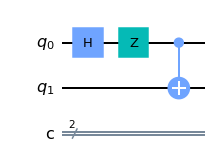

In [426]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#### Bell State ####
circuit.h(0) # Hadamard Gate at Q0
             # No Gate to Q1
             # CNOT Gate to Q0 & Q1 after error gate

circuit.z(0) # Add Bit-Flip Error to Q0

circuit.cx(0,1) # CNOT Gate to Q0 & Q1 for Bell State

circuit.draw() # Draw the circuit

In [427]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(circuit,backend).result().get_statevector()

array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

#### 2.3.2 Adding sign-flip error to Q1
$$Z|0\rangle = |0\rangle$$
So, the Z gate will not change Q1. 

This can also be shown by the state vector of the circuit simulated with sign-flip error at Q1 before CNOT.

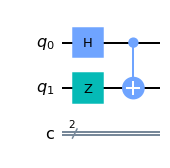

In [428]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#### Bell State ####
circuit.h(0) # Hadamard Gate at Q0
             # No Gate to Q1
             # CNOT Gate to Q0 & Q1 after error gate

circuit.z(1) # Add Sign-Flip Error to Q1

circuit.cx(0,1) # CNOT Gate to Q0 & Q1 for Bell State

circuit.draw() # Draw the circuit

In [429]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(circuit,backend).result().get_statevector()

array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

### 2.4 Conclusion

We have analysed the effect of the different errors on qubits Q0 and Q1.

1. Identity error does not change the state vector of the two qubits.
2. Bit-flip error has no effect on qubit Q0, however it flips the spin of qubit Q1.
3. Sign-flip error changes the phase of qubit Q0, however it does not change Q1.

## 3. Encoding for Errors

The bit-flip code and the sign-flip code can be used for encoding the qubits to fix errors.


### Bit-Flip Code
**Encoding:** To encode the qubit for bit-flip error, two ancillary qubits are required. CNOT gate is applied to these ancillary with the main qubit control.

**Decoding:** We encode the qubit again i.e., CNOT gate is applied to these ancillary with the main qubit as control and finally apply Toffoli gate to all the qubits to decode the main qubit.


### Sign-Flip Code
**Encoding:** To encode the qubit for sign-flip error, two ancillary qubits are required. H-gate is applied to the main qubit as well as the ancillary qubits. Finaly, CNOT gate is applied to these ancillary with the main qubit control.

**Decoding:** For decoding the circuit for sign-flip error, two ancillary qubits are required. CNOT gate is applied to these ancillary with the main qubit control. Then, H-gate is applied to the main qubit as well as the ancillary qubits. Finally, Toffoli gate is applied to all the qubits to decode the main qubit.

<br>

As the errors are applied before the CNOT Gate in Bell State, the encoding need to be done before the CNOT gate.

<ul>
    <li> Q0 is changed by sign-flip errors only. The identity errors and bit-flip errors do not change it. Therefore, sign-flip code can be used to encode Q0.
    </li>
    <li> Q1 is changed by bit-flip errors only. The identity errors and sign-flip errors do not change it. Therefore, bit-flip code can be used to encode Q1. 
    </li>
</ul>

<br>

The code given below encodes Q0 and Q1 accordingly. Sign-flip error is simulated for Q0 and bit-flip error is simulated for Q1.

In [430]:
def CNOT_ancillary(q,x,y): # CNOT Gate to ancillary qubits x, y; with q as control qubit
    circuit.cx(q, x)
    circuit.cx(q, y)

def H_all(q,x,y): # Hadamard Gate to qubits q, x, y
    circuit.h(q)
    circuit.h(x)
    circuit.h(y)

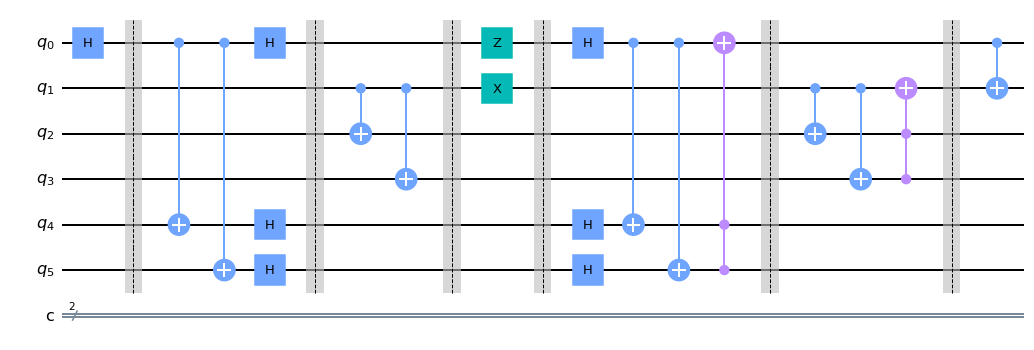

In [431]:
qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#### Bell State is formed by Q0 and Q1 ####
circuit.h(0) # Hadamard Gate at Q0
             # No Gate to Q1
             # CNOT Gate to Q0 & Q1 after encoding & decoding them for phase and bit flip errors respectively'''
###########################################   

#### Encoding ####
# Encoding Q0 for Phase Flip Error #
circuit.barrier()
CNOT_ancillary(0,4,5) # Apply CNOT Gate to ancillary qubits Q4, Q5 with Q0 as control qubit
H_all(0,4,5) # Apply Hadamard Gate to Q0 and ancillary qubits Q4, Q5

# Encoding Q1 for Bit Flip Error #
circuit.barrier()
CNOT_ancillary(1,2,3) # Apply CNOT Gate to ancillary qubits Q2, Q3 with Q1 as control qubit
#################


##### Simulating Errors #####
circuit.barrier()
circuit.z(0) # Simulating Q0 for Phase Flip Error
circuit.x(1) # Simulating Q1 for Bit Flip Error
#############################


#### Decoding ####
# Decoding Q0 for Phase Flip Error #
circuit.barrier()
H_all(0,4,5) # Apply Hadamard Gate to Q0 and ancillary qubits Q4, Q5
CNOT_ancillary(0,4,5) # Apply CNOT Gate to ancillary qubits Q4, Q5 with Q0 as control qubit
circuit.ccx(4,5,0) # Toffoli Gate for decoding Q0

# Decoding Q1 for Bit Flip Error #
circuit.barrier()
CNOT_ancillary(1,2,3) # Apply CNOT Gate to ancillary qubits Q2, Q3 with Q1 as control qubit
circuit.ccx(2,3,1) # Toffoli Gate for decoding Q1
#################


circuit.barrier()
circuit.cx(0,1) # CNOT Gate at Q0 and Q1 for Bell State


circuit.draw() # Draw the circuit

		 {'00': 496, '11': 528}


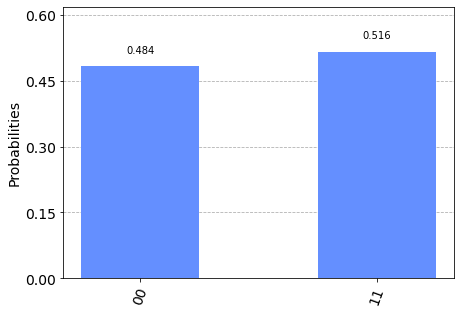

In [432]:
# Create a Quantum Circuit
meas = QuantumCircuit(6, 2)
meas.measure(range(2), range(2))

qc = circuit + meas

backend_sim = Aer.get_backend('qasm_simulator') # Use Aer's qasm_simulator

# Execute the circuit on the qasm simulator.
job_sim = execute(qc, backend_sim, shots=1024) # The number of repeats of the circuit is 1024
result_sim = job_sim.result() # Grab the results from the job.

counts = result_sim.get_counts(qc)
print("\t\t", counts)

plot_histogram(counts) # Plot Histogram for Bell State

When histogram of the probabilities of the outcomes of the final state is plotted, we observe that the state has approximately 50% probability of being measured in the state $|00\rangle$, and 50% chance of being measured in the state $|11\rangle$. So, the encoding fixes sign-flip error at Q0 and bit-flip error at Q1 before CNOT gate of Bell state.

<br>

## 4. Measurement

Measurements are taken after simulating for different errors.
<ul> 
    <li> Identity error does not change the state vector of the two qubits. So, we do not need to fix this.</li>
    <li> Bit-flip error has no effect on qubit Q0 and sign-flip error does not change Q1. So, this does not need to be considered. </li>
    <li> In the above code, the measurement of final state shows that the code fixes the combination of sign-flip error at Q0 and bit-flip error at Q1 before CNOT gate of Bell state.</li>

### 4.1 Simulating all errors before CNOT gate

Before the CNOT gate, all the errors gates are added:
1. The Identity 
2. The X gate (bit-flip error) 
3. The Z gate (sign-flip error)


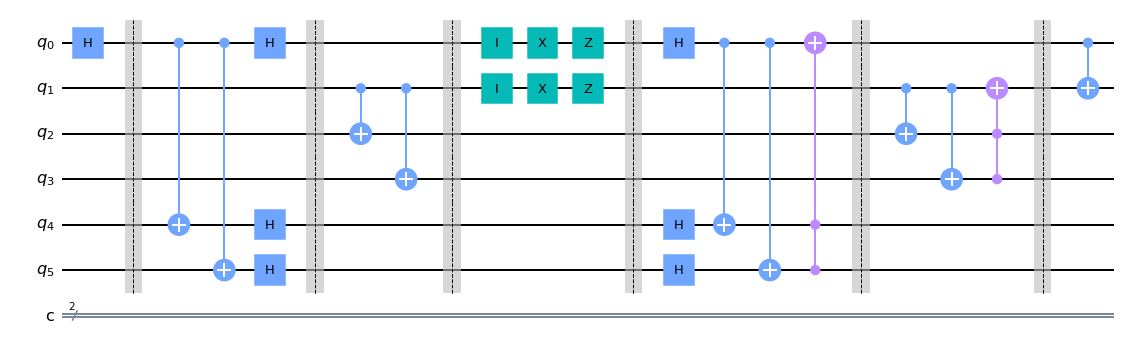

In [433]:
qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)


def CNOT_ancillary(q,x,y): # CNOT Gate to ancillary qubits x, y; with q as control qubit
    circuit.cx(q,x)
    circuit.cx(q,y)

def H_all(q,x,y): # Hadamard Gate to qubits q, x, y
    circuit.h(q)
    circuit.h(x)
    circuit.h(y)
    

#### Bell State is formed by Q0 and Q1 ####
circuit.h(0) # Hadamard Gate at Q0
             # No Gate to Q1
             # CNOT Gate to Q0 & Q1 after encoding & decoding them for phase and bit flip errors respectively'''
###########################################   

#### Encoding ####
# Encoding Q0 for Sign-Flip Error #
circuit.barrier()
CNOT_ancillary(0,4,5) # Apply CNOT Gate to ancillary qubits Q4, Q5 with Q0 as control qubit
H_all(0,4,5) # Apply Hadamard Gate to Q0 and ancillary qubits Q4, Q5

# Encoding Q1 for Bit-Flip Error #
circuit.barrier()
CNOT_ancillary(1,2,3) # Apply CNOT Gate to ancillary qubits Q2, Q3 with Q1 as control qubit
#################


##### Simulating Errors #####
circuit.barrier()
# Simulating Q1 for Identity Error
circuit.i(0) 
circuit.i(1)
# Simulating for Bit-Flip Error
circuit.x(0)
circuit.x(1)
# Simulating for Sign-Flip Error
circuit.z(0) 
circuit.z(1)
#############################


#### Decoding ####
# Decoding Q0 for Sign-Flip Error #
circuit.barrier()
H_all(0,4,5) # Apply Hadamard Gate to Q0 and ancillary qubits Q4, Q5
CNOT_ancillary(0,4,5) # Apply CNOT Gate to ancillary qubits Q4, Q5 with Q0 as control qubit
circuit.ccx(4,5,0) # Toffoli Gate for decoding Q0

# Decoding Q1 for Bit-Flip Error #
circuit.barrier()
CNOT_ancillary(1,2,3) # Apply CNOT Gate to ancillary qubits Q2, Q3 with Q1 as control qubit
circuit.ccx(2,3,1) # Toffoli Gate for decoding Q1
#################


circuit.barrier()
circuit.cx(0,1) # CNOT Gate at Q0 and Q1 for Bell State


circuit.draw() # Draw the circuit

		 {'00': 500, '11': 524}


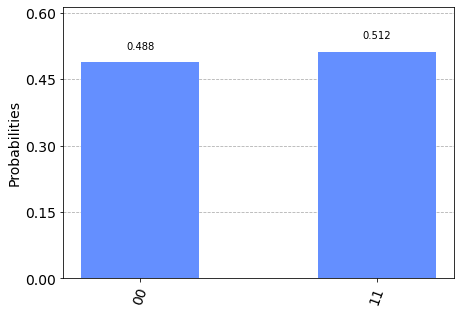

In [434]:
# Create a Quantum Circuit
meas = QuantumCircuit(6, 2)
meas.measure(range(2), range(2))

qc = circuit + meas

backend_sim = Aer.get_backend('qasm_simulator') # Use Aer's qasm_simulator

# Execute the circuit on the qasm simulator.
job_sim = execute(qc, backend_sim, shots=1024) # The number of repeats of the circuit is 1024
result_sim = job_sim.result() # Grab the results from the job.

counts = result_sim.get_counts(qc)
print("\t\t", counts)

plot_histogram(counts) # Plot Histogram for Bell State

When histogram of the probabilities of the outcomes of the final state is plotted, we observe that the state has approximately 50% probability of being measured in the state $|00\rangle$, and 50% chance of being measured in the state $|11\rangle$. The measurement of final state shows that the code fixes the combination of identity error, bit-flip error and sign-flip error at both the qubits before CNOT gate of Bell state.

<br>

### 4.2 Simulating the circuit without any errors
No errors gates are added before the CNOT gate.

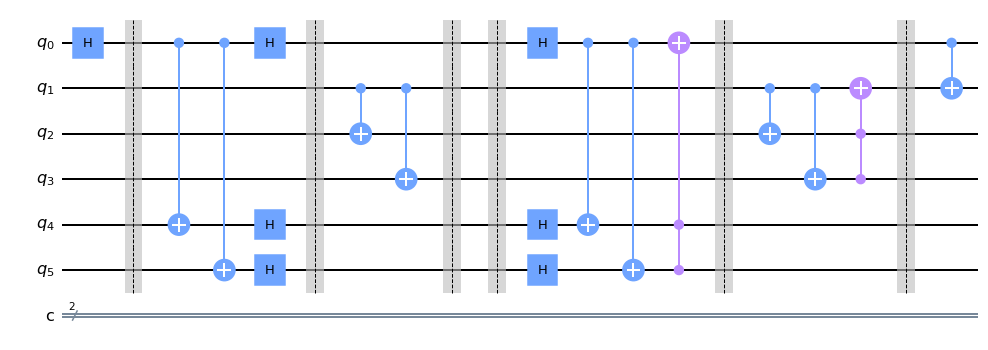

In [435]:
qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)


def CNOT_ancillary(q,x,y): # CNOT Gate to ancillary qubits x, y; with q as control qubit
    circuit.cx(q,x)
    circuit.cx(q,y)

def H_all(q,x,y): # Hadamard Gate to qubits q, x, y
    circuit.h(q)
    circuit.h(x)
    circuit.h(y)
    

#### Bell State is formed by Q0 and Q1 ####
circuit.h(0) # Hadamard Gate at Q0
             # No Gate to Q1
             # CNOT Gate to Q0 & Q1 after encoding & decoding them for phase and bit flip errors respectively'''
###########################################   

#### Encoding ####
# Encoding Q0 for Sign-Flip Error #
circuit.barrier()
CNOT_ancillary(0,4,5) # Apply CNOT Gate to ancillary qubits Q4, Q5 with Q0 as control qubit
H_all(0,4,5) # Apply Hadamard Gate to Q0 and ancillary qubits Q4, Q5

# Encoding Q1 for Bit-Flip Error #
circuit.barrier()
CNOT_ancillary(1,2,3) # Apply CNOT Gate to ancillary qubits Q2, Q3 with Q1 as control qubit
#################


##### Simulating Errors #####
circuit.barrier()
# No error is simulated
#############################


#### Decoding ####
# Decoding Q0 for Sign-Flip Error #
circuit.barrier()
H_all(0,4,5) # Apply Hadamard Gate to Q0 and ancillary qubits Q4, Q5
CNOT_ancillary(0,4,5) # Apply CNOT Gate to ancillary qubits Q4, Q5 with Q0 as control qubit
circuit.ccx(4,5,0) # Toffoli Gate for decoding Q0

# Decoding Q1 for Bit-Flip Error #
circuit.barrier()
CNOT_ancillary(1,2,3) # Apply CNOT Gate to ancillary qubits Q2, Q3 with Q1 as control qubit
circuit.ccx(2,3,1) # Toffoli Gate for decoding Q1
#################


circuit.barrier()
circuit.cx(0,1) # CNOT Gate at Q0 and Q1 for Bell State

circuit.draw() # Draw the circuit

		 {'00': 510, '11': 514}


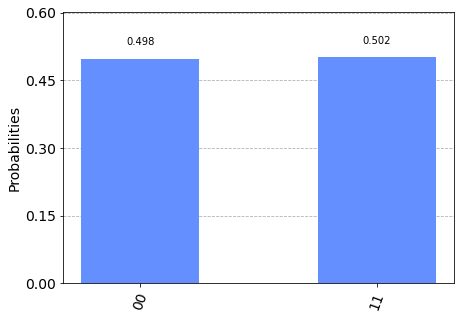

In [436]:
# Create a Quantum Circuit
meas = QuantumCircuit(6, 2)
meas.measure(range(2), range(2))

qc = circuit + meas

backend_sim = Aer.get_backend('qasm_simulator') # Use Aer's qasm_simulator

# Execute the circuit on the qasm simulator.
job_sim = execute(qc, backend_sim, shots=1024) # The number of repeats of the circuit is 1024
result_sim = job_sim.result() # Grab the results from the job.

counts = result_sim.get_counts(qc)
print("\t\t", counts)

plot_histogram(counts) # Plot Histogram for Bell State

When histogram of the probabilities of the outcomes of the final state is plotted, we observe that the state has approximately 50% probability of being measured in the state $|00\rangle$, and 50% chance of being measured in the state $|11\rangle$. The measurement of final state shows that the results are not affected even when no error gates are present.

<br>

### 4.3 Simulating the circuit with sign-flip error at Q0
Z-gate is applied to Q0 for simulating sign-flip error at Q0.

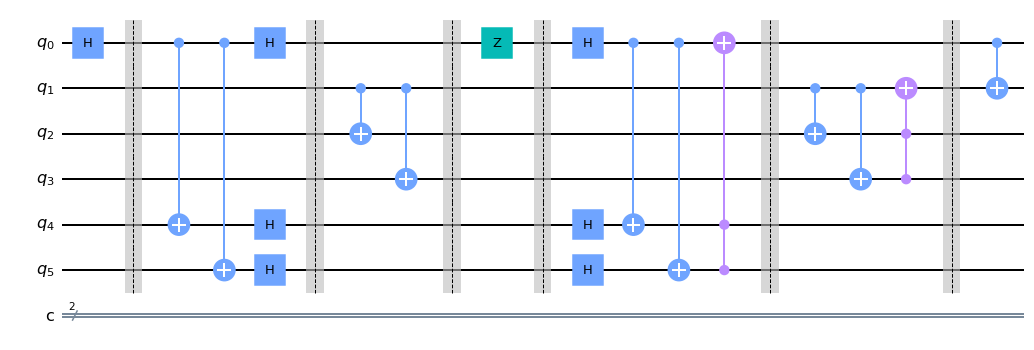

In [437]:
qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)


def CNOT_ancillary(q,x,y): # CNOT Gate to ancillary qubits x, y; with q as control qubit
    circuit.cx(q,x)
    circuit.cx(q,y)

def H_all(q,x,y): # Hadamard Gate to qubits q, x, y
    circuit.h(q)
    circuit.h(x)
    circuit.h(y)
    

#### Bell State is formed by Q0 and Q1 ####
circuit.h(0) # Hadamard Gate at Q0
             # No Gate to Q1
             # CNOT Gate to Q0 & Q1 after encoding & decoding them for phase and bit flip errors respectively'''
###########################################   

#### Encoding ####
# Encoding Q0 for Sign-Flip Error #
circuit.barrier()
CNOT_ancillary(0,4,5) # Apply CNOT Gate to ancillary qubits Q4, Q5 with Q0 as control qubit
H_all(0,4,5) # Apply Hadamard Gate to Q0 and ancillary qubits Q4, Q5

# Encoding Q1 for Bit-Flip Error #
circuit.barrier()
CNOT_ancillary(1,2,3) # Apply CNOT Gate to ancillary qubits Q2, Q3 with Q1 as control qubit
#################


##### Simulating Errors #####
circuit.barrier()
circuit.z(0)
#############################


#### Decoding ####
# Decoding Q0 for Sign-Flip Error #
circuit.barrier()
H_all(0,4,5) # Apply Hadamard Gate to Q0 and ancillary qubits Q4, Q5
CNOT_ancillary(0,4,5) # Apply CNOT Gate to ancillary qubits Q4, Q5 with Q0 as control qubit
circuit.ccx(4,5,0) # Toffoli Gate for decoding Q0

# Decoding Q1 for Bit-Flip Error #
circuit.barrier()
CNOT_ancillary(1,2,3) # Apply CNOT Gate to ancillary qubits Q2, Q3 with Q1 as control qubit
circuit.ccx(2,3,1) # Toffoli Gate for decoding Q1
#################


circuit.barrier()
circuit.cx(0,1) # CNOT Gate at Q0 and Q1 for Bell State

circuit.draw() # Draw the circuit

		 {'00': 546, '11': 478}


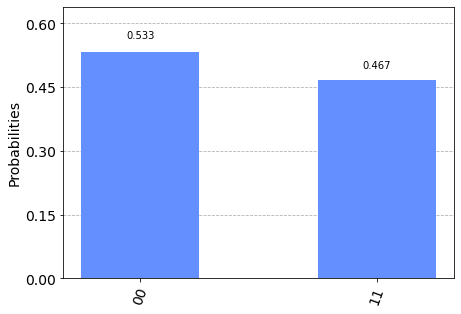

In [438]:
# Create a Quantum Circuit
meas = QuantumCircuit(6, 2)
meas.measure(range(2), range(2))

qc = circuit + meas

backend_sim = Aer.get_backend('qasm_simulator') # Use Aer's qasm_simulator

# Execute the circuit on the qasm simulator.
job_sim = execute(qc, backend_sim, shots=1024) # The number of repeats of the circuit is 1024
result_sim = job_sim.result() # Grab the results from the job.

counts = result_sim.get_counts(qc)
print("\t\t", counts)

plot_histogram(counts) # Plot Histogram for Bell State

When histogram of the probabilities of the outcomes of the final state is plotted, we observe that the state has approximately 50% probability of being measured in the state $|00\rangle$, and 50% chance of being measured in the state $|11\rangle$. The measurement of final state shows that the code fixes sign-flip error at Q0 before CNOT gate of Bell state.

<br>

### 4.4 Simulating the circuit with bit-flip error at Q1
X-gate is applied to Q0 for simulating bit-flip error at Q1.

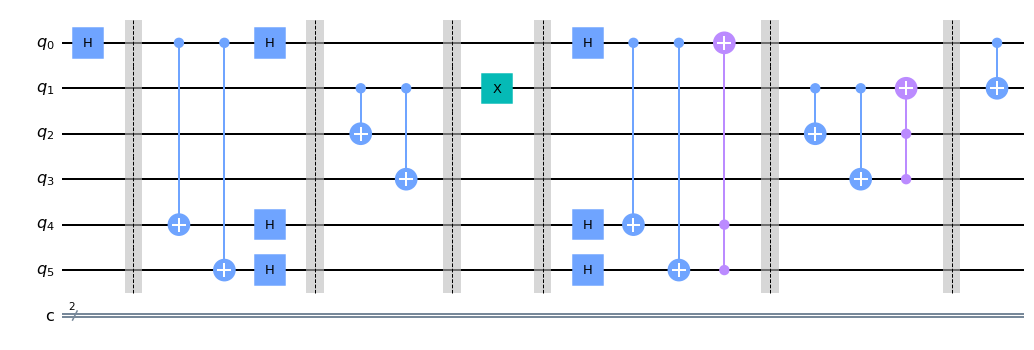

In [439]:
qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)


def CNOT_ancillary(q,x,y): # CNOT Gate to ancillary qubits x, y; with q as control qubit
    circuit.cx(q,x)
    circuit.cx(q,y)

def H_all(q,x,y): # Hadamard Gate to qubits q, x, y
    circuit.h(q)
    circuit.h(x)
    circuit.h(y)
    

#### Bell State is formed by Q0 and Q1 ####
circuit.h(0) # Hadamard Gate at Q0
             # No Gate to Q1
             # CNOT Gate to Q0 & Q1 after encoding & decoding them for phase and bit flip errors respectively'''
###########################################   

#### Encoding ####
# Encoding Q0 for Sign-Flip Error #
circuit.barrier()
CNOT_ancillary(0,4,5) # Apply CNOT Gate to ancillary qubits Q4, Q5 with Q0 as control qubit
H_all(0,4,5) # Apply Hadamard Gate to Q0 and ancillary qubits Q4, Q5

# Encoding Q1 for Bit-Flip Error #
circuit.barrier()
CNOT_ancillary(1,2,3) # Apply CNOT Gate to ancillary qubits Q2, Q3 with Q1 as control qubit
#################


##### Simulating Errors #####
circuit.barrier()
circuit.x(1)
#############################


#### Decoding ####
# Decoding Q0 for Sign-Flip Error #
circuit.barrier()
H_all(0,4,5) # Apply Hadamard Gate to Q0 and ancillary qubits Q4, Q5
CNOT_ancillary(0,4,5) # Apply CNOT Gate to ancillary qubits Q4, Q5 with Q0 as control qubit
circuit.ccx(4,5,0) # Toffoli Gate for decoding Q0

# Decoding Q1 for Bit-Flip Error #
circuit.barrier()
CNOT_ancillary(1,2,3) # Apply CNOT Gate to ancillary qubits Q2, Q3 with Q1 as control qubit
circuit.ccx(2,3,1) # Toffoli Gate for decoding Q1
#################


circuit.barrier()
circuit.cx(0,1) # CNOT Gate at Q0 and Q1 for Bell State

circuit.draw() # Draw the circuit

		 {'00': 516, '11': 508}


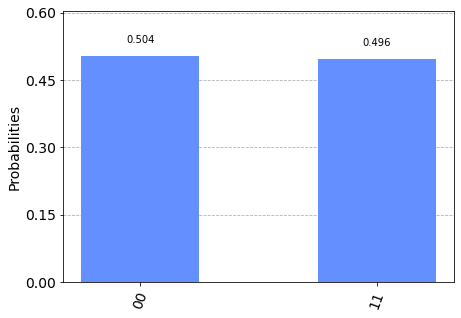

In [440]:
# Create a Quantum Circuit
meas = QuantumCircuit(6, 2)
meas.measure(range(2), range(2))

qc = circuit + meas

backend_sim = Aer.get_backend('qasm_simulator') # Use Aer's qasm_simulator

# Execute the circuit on the qasm simulator.
job_sim = execute(qc, backend_sim, shots=1024) # The number of repeats of the circuit is 1024
result_sim = job_sim.result() # Grab the results from the job.

counts = result_sim.get_counts(qc)
print("\t\t", counts)

plot_histogram(counts) # Plot Histogram for Bell State

When histogram of the probabilities of the outcomes of the final state is plotted, we observe that the state has approximately 50% probability of being measured in the state $|00\rangle$, and 50% chance of being measured in the state $|11\rangle$. The measurement of final state shows that the code fixes bit-flip error at Q1 before CNOT gate of Bell state.

<br>

## 4.5 Conclusion

Measurements are taken and analysed after simulating for different errors. The measurement of final state for different cases shows that:

<ul> 
    <li>The code fixes sign-flip error at Q0 and bit-flip error at Q1 before CNOT gate of Bell state. 
    </li>
    <li>The code fixes the combination of identity error, bit-flip error and sign-flip error at both the qubits before CNOT gate of Bell state. 
    </li>
    <li>Simulating without any errors before CNOT gate of Bell state, does not change the final state. 
    </li>
    <li>The code fixes sign-flip error at Q0 before CNOT gate of Bell state. 
    </li>
    <li>The code fixes bit-flip error at Q1 before CNOT gate of Bell state. 
    </li>
</ul>

Hence, the code can be used to encode and decode each of the two qubits, in such a way that all the possible choices for the error gates (I-gate, X-gate and Z-gate) applied before CNOT gate of the Bell State, occurring on the logical qubits, can be detected and fixed.
